In this file, the calculation of the Price-to-Earnings Ratio (PER) has been attempted.

Yearly operating income data from DART has been utilized, but several issues have arisen:
- The fluctuation of PER is excessively high due to changes in operating income.
- The decision regarding which year's operating income (EPS) data to use when dividing the price is also ambiguous.
- DART data is only available since 2015, although some data could potentially be obtained from year of 2013 using 2015 report
- Making adjustments with total shares outstanding in the past is challenging, as such historical data is not readily available.

To improve the calculation of PER, consider the following points:
- You may consider using normalized operating income (e.g., a 3-year average) to calculate EPS. This approach would take into account the company's capacity to generate income over the past 1-3 years (V).
- It might be beneficial to explore alternative financial metrics such as net income or EBITDA when evaluating a company's performance.
- Investigate the possibility of obtaining PER data from sources other than DART to cross-verify and validate your calculations.
- Instead of using yearly data, you could calculate PER using the operating income of the trailing 4 quarters for a more current assessment.
- Consider adopting a completely different approach, such as grouping companies with respect to their performance in groups: A,B,C... etc

In [1]:
import FinanceDataReader as fdr
import pandas as pd
import OpenDartReader 
import json

df_krx_desc = fdr.StockListing('KRX-DESC')
df_krx = fdr.StockListing('KRX')
df_krx.drop(columns=['Close', 'ChangeCode', 'Changes', 'ChagesRatio', 'Open', 'High', 'Low', 'Volume', 'Amount'], inplace=True)

# for file C:\Users\user\projects\trader\venv\Lib\site-packages\FinanceDataReader\krx\listing.py: .... 
# url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13'
# df_listing = pd.read_html(url, header=0, encoding='euc-kr')[0]  # Use 'euc-kr' encoding

c:\Users\user\projects\trader\venv\Lib\site-packages\bs4\__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


In [2]:

cols_to_use = df_krx_desc.columns.difference(df_krx.columns).tolist()
cols_to_use.append('Code')
df_krx = df_krx.merge(df_krx_desc[cols_to_use], on='Code', how='left')

In [3]:
df_krx=df_krx[~df_krx['Dept'].str.contains('관리')]   # remove companies in trouble

In [4]:
df_krx_5000 = df_krx.loc[df_krx['Marcap'] >= 5000*10**8]
sectors_5000 = df_krx_5000[['Code', 'Sector']].dropna().groupby('Sector').count().sort_values('Code', ascending=False)
sectors_5000 = sectors_5000.loc[sectors_5000['Code']>=10]
sector_01 = df_krx_5000.loc[df_krx_5000['Sector']=='특수 목적용 기계 제조업']

In [5]:
price_01 = pd.DataFrame()
for code in sector_01['Code'][:]:
    price_01 = pd.concat([price_01, fdr.DataReader(code)['Close'].rename(code, inplace=True)], axis=1)
price_01 = price_01[price_01.index>=pd.Timestamp('2013-01-01')]  
# price_01 = price_01.map(lambda x: x/1000)
price_01 = price_01.sort_index()

In [6]:
sector_01

,Code,ISU_CD,Name,Market,Dept,Marcap,Stocks,MarketId,HomePage,Industry,ListingDate,Region,Representative,Sector,SettleMonth
64,241560,KR7241560002,두산밥캣,KOSPI,,5513704130000,100249166,STK,http://www.doosanbobcat.com,"Compact Equipment, Heavy Equipment, Portable P...",2016-11-18,경기도,"스캇성철박, 조덕제",특수 목적용 기계 제조업,12월
78,042700,KR7042700005,한미반도체,KOSPI,,4847497239600,97339302,STK,http://www.hanmisemi.com,"반도체 후공정장비,반도체금형 제조/부동산 매매,임대",2005-07-22,인천광역시,곽동신,특수 목적용 기계 제조업,12월
101,277810,KR7277810008,레인보우로보틱스,KOSDAQ,기술성장기업부,3207207603600,19250946,KSQ,http://www.rainbow-robotics.com/new/index_ko.php,"협동로봇, 천문마운트시스템, 이족보행로봇 등",2021-02-03,대전광역시,이정호,특수 목적용 기계 제조업,12월
123,403870,KR7403870009,HPSP,KOSDAQ,벤처기업부,2483465400000,81159000,KSQ,http://www.thehpsp.com/,고압 수소 어닐링 장비,2022-07-15,경기도,김용운,특수 목적용 기계 제조업,12월
141,042670,KR7042670000,HD현대인프라코어,KOSPI,,2197634017530,199603453,STK,http://www.hd-infracore.com,"굴착기,엔진 제조,도소매",2001-02-02,인천광역시,"조영철, 오승현",특수 목적용 기계 제조업,12월
169,039030,KR7039030002,이오테크닉스,KOSDAQ GLOBAL,우량기업부,1681618575000,12319550,KSQ,http://www.eotechnics.com,레이저 마커 및 레이저 응용기기,2000-08-24,경기도,"성규동,박종구(각자대표이사)",특수 목적용 기계 제조업,12월
171,240810,KR7240810002,원익IPS,KOSDAQ GLOBAL,우량기업부,1644310683500,49083901,KSQ,http://.www.ips.co.kr,반도체 제조용 기계,2016-05-02,경기도,Hyeondeok Lee,특수 목적용 기계 제조업,12월
188,137400,KR7137400008,피엔티,KOSDAQ GLOBAL,우량기업부,1453162552200,22741198,KSQ,http://www.epnt.co.kr,2차전지 및 전자소재용 Roll-to-Roll 장비,2012-07-06,경상북도,김준섭,특수 목적용 기계 제조업,12월
191,372170,KR7372170001,윤성에프앤씨,KOSDAQ,기술성장기업부,1434632830400,7979048,KSQ,http://www.ysfc.co.kr,2차전지용 믹싱시스템,2022-11-14,경기도,박치영,특수 목적용 기계 제조업,12월
205,036930,KR7036930006,주성엔지니어링,KOSDAQ GLOBAL,우량기업부,1336503172400,48249212,KSQ,http://www.jseng.com,LP CVD,1999-12-24,경기도,황철주,특수 목적용 기계 제조업,12월


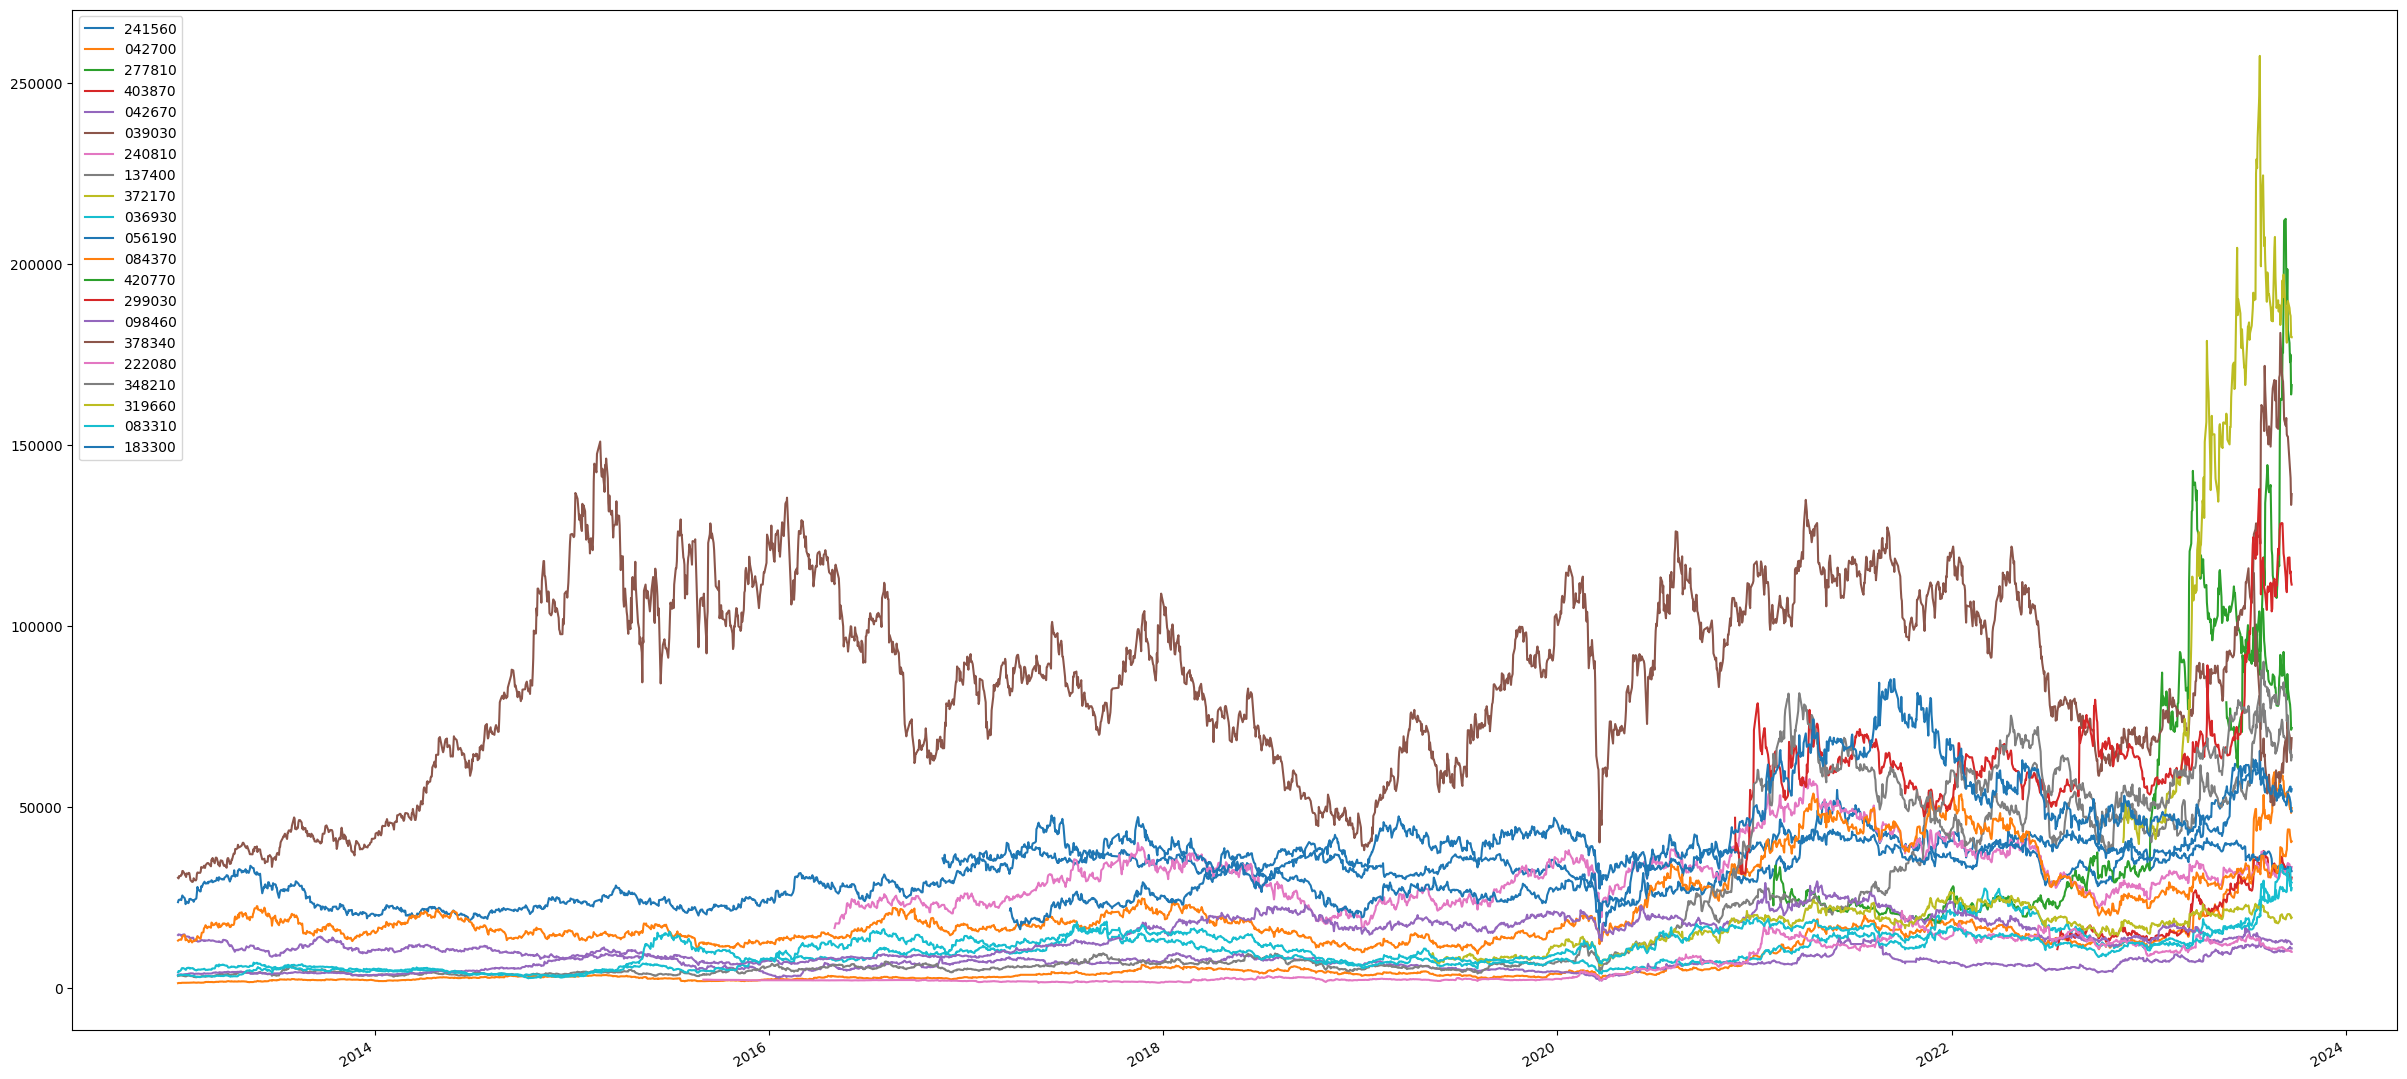

In [7]:
plot_01 = price_01.plot(figsize=(30,15))


In [8]:
with open('../../config/config.json', 'r') as json_file:
    config = json.load(json_file)
    dart_api = config['dart_api']

dart = OpenDartReader(dart_api)

In [9]:
import datetime
current_year = datetime.datetime.now().year

records = []
for code in sector_01['Code'].values:
    record = {'code': code}
    record['nm_shares']=int(sector_01.loc[sector_01['Code']==code]['Stocks'].iloc[0])
    listed_year = sector_01.loc[sector_01['Code']==code]['ListingDate'].iloc[0].year
    if listed_year < 2015:  # Dart only serves since 2015
        listed_year = 2015
    elif listed_year == current_year: 
        continue
    rec = dart.finstate(code, bsns_year=listed_year)
    try:
        record[listed_year-2] = int(rec.loc[rec['account_nm']=='영업이익'].iloc[0,:]['bfefrmtrm_amount'].replace(',',''))
        record[listed_year-1] = int(rec.loc[rec['account_nm']=='영업이익'].iloc[0,:]['frmtrm_amount'].replace(',',''))
    except: 
        pass
    record[listed_year] = int(rec.loc[rec['account_nm']=='영업이익'].iloc[0,:]['thstrm_amount'].replace(',',''))
    for yr in range(listed_year+1, 2023):
        rec = dart.finstate(code, bsns_year=yr)
        opincome = int(rec.loc[rec['account_nm']=='영업이익'].iloc[0,:]['thstrm_amount'].replace(',',''))   # CFS/OFS (if Consolidated exists consolidated op income, otherwise standalone op income)
        record[yr] = opincome
    records.append(record)
    


In [47]:
df_EPS_01 = pd.DataFrame(records).set_index('code')
display(df_EPS_01)
columns_EPS_01 = [col for col in df_EPS.columns if col != 'nm_shares']
for col in columns_EPS_01: 
    df_EPS_01[col] = (df_EPS_01[col]/df_EPS_01['nm_shares']).round(3)

df_EPS_01=df_EPS_01[columns_EPS_01].reindex(sorted(columns_EPS_01), axis=1)

,nm_shares,2014,2015,2016,2017,2018,2019,2020,2021,2022,2013
code,,,,,,,,,,,
241560,100249166,2.802471e+11,3.855726e+11,4.140061e+11,3.945157e+11,4.590500e+11,4.770149e+11,393864007000,595338266000,1071606774000,NaN
042700,97339302,4.908466e+10,2.274166e+10,3.855446e+10,5.165517e+10,5.678892e+10,1.372536e+10,66649466315,122419465500,111859422080,1.346062e+10
277810,19250946,NaN,NaN,NaN,NaN,NaN,-5.402275e+09,-1348800253,-1030713533,1300876285,NaN
403870,81159000,NaN,NaN,NaN,NaN,NaN,NaN,24792911141,45212380589,85174462019,NaN
042670,199603453,4.529944e+11,2.744108e+10,4.908182e+11,6.607693e+11,8.481274e+11,8.403971e+11,658598614679,264507805577,332546884265,3.695004e+11
039030,12319550,5.666449e+10,2.854544e+10,2.125874e+10,5.997912e+10,1.785892e+10,7.100165e+09,38485391168,78136358339,92798680886,4.309927e+10
240810,49083901,NaN,NaN,2.872040e+10,1.222518e+11,1.058945e+11,4.111603e+10,140597242597,164128988758,97554876588,NaN
137400,22741198,8.815922e+09,-1.942015e+08,7.473031e+09,1.027212e+10,3.754189e+09,1.477775e+09,55300226026,54408331244,77765165313,4.592876e+09
372170,7979048,NaN,NaN,NaN,NaN,NaN,NaN,18974100927,-4608545579,32072532646,NaN


In [25]:
display(df_EPS_01)
display(price_01)

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
code,,,,,,,,,,
241560,NaN,2795.506,3846.143,4129.771,3935.352,4579.090,4758.293,3928.851,5938.586,10689.433
042700,138.286,504.264,233.633,396.083,530.671,583.412,141.005,684.713,1257.657,1149.170
277810,NaN,NaN,NaN,NaN,NaN,NaN,-280.624,-70.064,-53.541,67.575
403870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.486,557.084,1049.476
042670,1851.172,2269.472,137.478,2458.966,3310.410,4249.062,4210.333,3299.535,1325.166,1666.038
039030,3498.445,4599.558,2317.085,1725.610,4868.613,1449.641,576.333,3123.928,6342.469,7532.636
240810,NaN,NaN,NaN,585.129,2490.669,2157.418,837.668,2864.427,3343.846,1987.513
137400,201.963,387.663,-8.540,328.612,451.696,165.083,64.982,2431.720,2392.501,3419.572
372170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2377.991,-577.581,4019.594


,241560,042700,277810,403870,042670,039030,240810,137400,372170,036930,...,084370,420770,299030,098460,378340,222080,348210,319660,083310,183300
2013-01-02,NaN,1430.0,NaN,NaN,14726.0,30550.0,NaN,3412.0,NaN,4415,...,13180.0,NaN,NaN,3736.0,NaN,NaN,NaN,NaN,3528.0,NaN
2013-01-03,NaN,1484.0,NaN,NaN,14895.0,30350.0,NaN,3462.0,NaN,4770,...,13319.0,NaN,NaN,3756.0,NaN,NaN,NaN,NaN,3621.0,NaN
2013-01-04,NaN,1486.0,NaN,NaN,14853.0,31000.0,NaN,3462.0,NaN,4639,...,13411.0,NaN,NaN,3790.0,NaN,NaN,NaN,NaN,3635.0,NaN
2013-01-07,NaN,1480.0,NaN,NaN,14768.0,31000.0,NaN,3564.0,NaN,4949,...,13458.0,NaN,NaN,3843.0,NaN,NaN,NaN,NaN,3743.0,NaN
2013-01-08,NaN,1474.0,NaN,NaN,14514.0,31400.0,NaN,3549.0,NaN,5192,...,13411.0,NaN,NaN,3883.0,NaN,NaN,NaN,NaN,3635.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-18,55200.0,50300.0,178200.0,31650.0,11210.0,145300.0,34250.0,69600.0,187900.0,29550,...,43850.0,79300.0,119000.0,12960.0,69900.0,10280.0,66000.0,20500.0,32100.0,52800.0
2023-09-19,55700.0,49550.0,172900.0,30300.0,11460.0,143000.0,33550.0,67500.0,186300.0,28300,...,42150.0,78400.0,114600.0,12860.0,65100.0,10330.0,65200.0,20150.0,33350.0,52000.0
2023-09-20,55700.0,49700.0,175000.0,30550.0,11120.0,140900.0,33250.0,68100.0,185700.0,28850,...,41350.0,76300.0,115200.0,12620.0,66200.0,10460.0,65500.0,20150.0,30700.0,51200.0
2023-09-21,54300.0,48450.0,164000.0,29900.0,11000.0,133500.0,32700.0,64600.0,179800.0,27000,...,40350.0,71400.0,112300.0,12200.0,66200.0,10070.0,62900.0,19300.0,29300.0,48750.0


In [26]:
new_column_names = {col: col + 1 for col in df_EPS_01.columns}
df_EPS_year_adjust_01 = df_EPS_01.rename(columns=new_column_names)
divider_01 = pd.DataFrame()
divider_01['year'] = [i.year for i in price_01.index]
divider_01 = divider_01.merge(df_EPS_year_adjust_01.T, how='left', left_on='year', right_on=df_EPS_year_adjust_01.T.index)
display(divider_01)

,year,241560,042700,277810,403870,042670,039030,240810,137400,372170,036930,056190,084370,299030,098460,222080,348210,319660,083310,183300
0,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,2023,10689.433,1149.17,67.575,1049.476,1666.038,7532.636,1987.513,3419.572,4019.594,2567.586,4481.367,2340.76,1385.623,644.656,111.294,5541.257,3170.639,1674.329,5295.784
2639,2023,10689.433,1149.17,67.575,1049.476,1666.038,7532.636,1987.513,3419.572,4019.594,2567.586,4481.367,2340.76,1385.623,644.656,111.294,5541.257,3170.639,1674.329,5295.784
2640,2023,10689.433,1149.17,67.575,1049.476,1666.038,7532.636,1987.513,3419.572,4019.594,2567.586,4481.367,2340.76,1385.623,644.656,111.294,5541.257,3170.639,1674.329,5295.784
2641,2023,10689.433,1149.17,67.575,1049.476,1666.038,7532.636,1987.513,3419.572,4019.594,2567.586,4481.367,2340.76,1385.623,644.656,111.294,5541.257,3170.639,1674.329,5295.784


,241560,042700,277810,403870,042670,039030,240810,137400,372170,036930,...,084370,420770,299030,098460,378340,222080,348210,319660,083310,183300
2013-01-02,NaN,1430.0,NaN,NaN,14726.0,30550.0,NaN,3412.0,NaN,4415,...,13180.0,NaN,NaN,3736.0,NaN,NaN,NaN,NaN,3528.0,NaN
2013-01-03,NaN,1484.0,NaN,NaN,14895.0,30350.0,NaN,3462.0,NaN,4770,...,13319.0,NaN,NaN,3756.0,NaN,NaN,NaN,NaN,3621.0,NaN
2013-01-04,NaN,1486.0,NaN,NaN,14853.0,31000.0,NaN,3462.0,NaN,4639,...,13411.0,NaN,NaN,3790.0,NaN,NaN,NaN,NaN,3635.0,NaN
2013-01-07,NaN,1480.0,NaN,NaN,14768.0,31000.0,NaN,3564.0,NaN,4949,...,13458.0,NaN,NaN,3843.0,NaN,NaN,NaN,NaN,3743.0,NaN
2013-01-08,NaN,1474.0,NaN,NaN,14514.0,31400.0,NaN,3549.0,NaN,5192,...,13411.0,NaN,NaN,3883.0,NaN,NaN,NaN,NaN,3635.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-18,55200.0,50300.0,178200.0,31650.0,11210.0,145300.0,34250.0,69600.0,187900.0,29550,...,43850.0,79300.0,119000.0,12960.0,69900.0,10280.0,66000.0,20500.0,32100.0,52800.0
2023-09-19,55700.0,49550.0,172900.0,30300.0,11460.0,143000.0,33550.0,67500.0,186300.0,28300,...,42150.0,78400.0,114600.0,12860.0,65100.0,10330.0,65200.0,20150.0,33350.0,52000.0
2023-09-20,55700.0,49700.0,175000.0,30550.0,11120.0,140900.0,33250.0,68100.0,185700.0,28850,...,41350.0,76300.0,115200.0,12620.0,66200.0,10460.0,65500.0,20150.0,30700.0,51200.0
2023-09-21,54300.0,48450.0,164000.0,29900.0,11000.0,133500.0,32700.0,64600.0,179800.0,27000,...,40350.0,71400.0,112300.0,12200.0,66200.0,10070.0,62900.0,19300.0,29300.0,48750.0


,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
code,,,,,,,,,,
241560,NaN,2795.506,3846.143,4129.771,3935.352,4579.090,4758.293,3928.851,5938.586,10689.433
042700,138.286,504.264,233.633,396.083,530.671,583.412,141.005,684.713,1257.657,1149.170
277810,NaN,NaN,NaN,NaN,NaN,NaN,-280.624,-70.064,-53.541,67.575
403870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.486,557.084,1049.476
042670,1851.172,2269.472,137.478,2458.966,3310.410,4249.062,4210.333,3299.535,1325.166,1666.038
039030,3498.445,4599.558,2317.085,1725.610,4868.613,1449.641,576.333,3123.928,6342.469,7532.636
240810,NaN,NaN,NaN,585.129,2490.669,2157.418,837.668,2864.427,3343.846,1987.513
137400,201.963,387.663,-8.540,328.612,451.696,165.083,64.982,2431.720,2392.501,3419.572
372170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2377.991,-577.581,4019.594


,241560,042700,277810,403870,042670,039030,240810,137400,372170,036930,056190,084370,299030,098460,222080,348210,319660,083310,183300
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-18,5.164,43.771,2637.070,30.158,6.729,19.289,17.233,20.353,46.746,11.509,7.408,18.733,85.882,20.104,92.368,11.911,6.466,19.172,9.970
2023-09-19,5.211,43.118,2558.639,28.872,6.879,18.984,16.880,19.739,46.348,11.022,7.442,18.007,82.706,19.949,92.817,11.766,6.355,19.918,9.819
2023-09-20,5.211,43.249,2589.715,29.110,6.675,18.705,16.729,19.915,46.199,11.236,7.464,17.665,83.139,19.576,93.985,11.820,6.355,18.336,9.668
2023-09-21,5.080,42.161,2426.933,28.490,6.602,17.723,16.453,18.891,44.731,10.516,7.241,17.238,81.047,18.925,90.481,11.351,6.087,17.500,9.205


<Axes: >

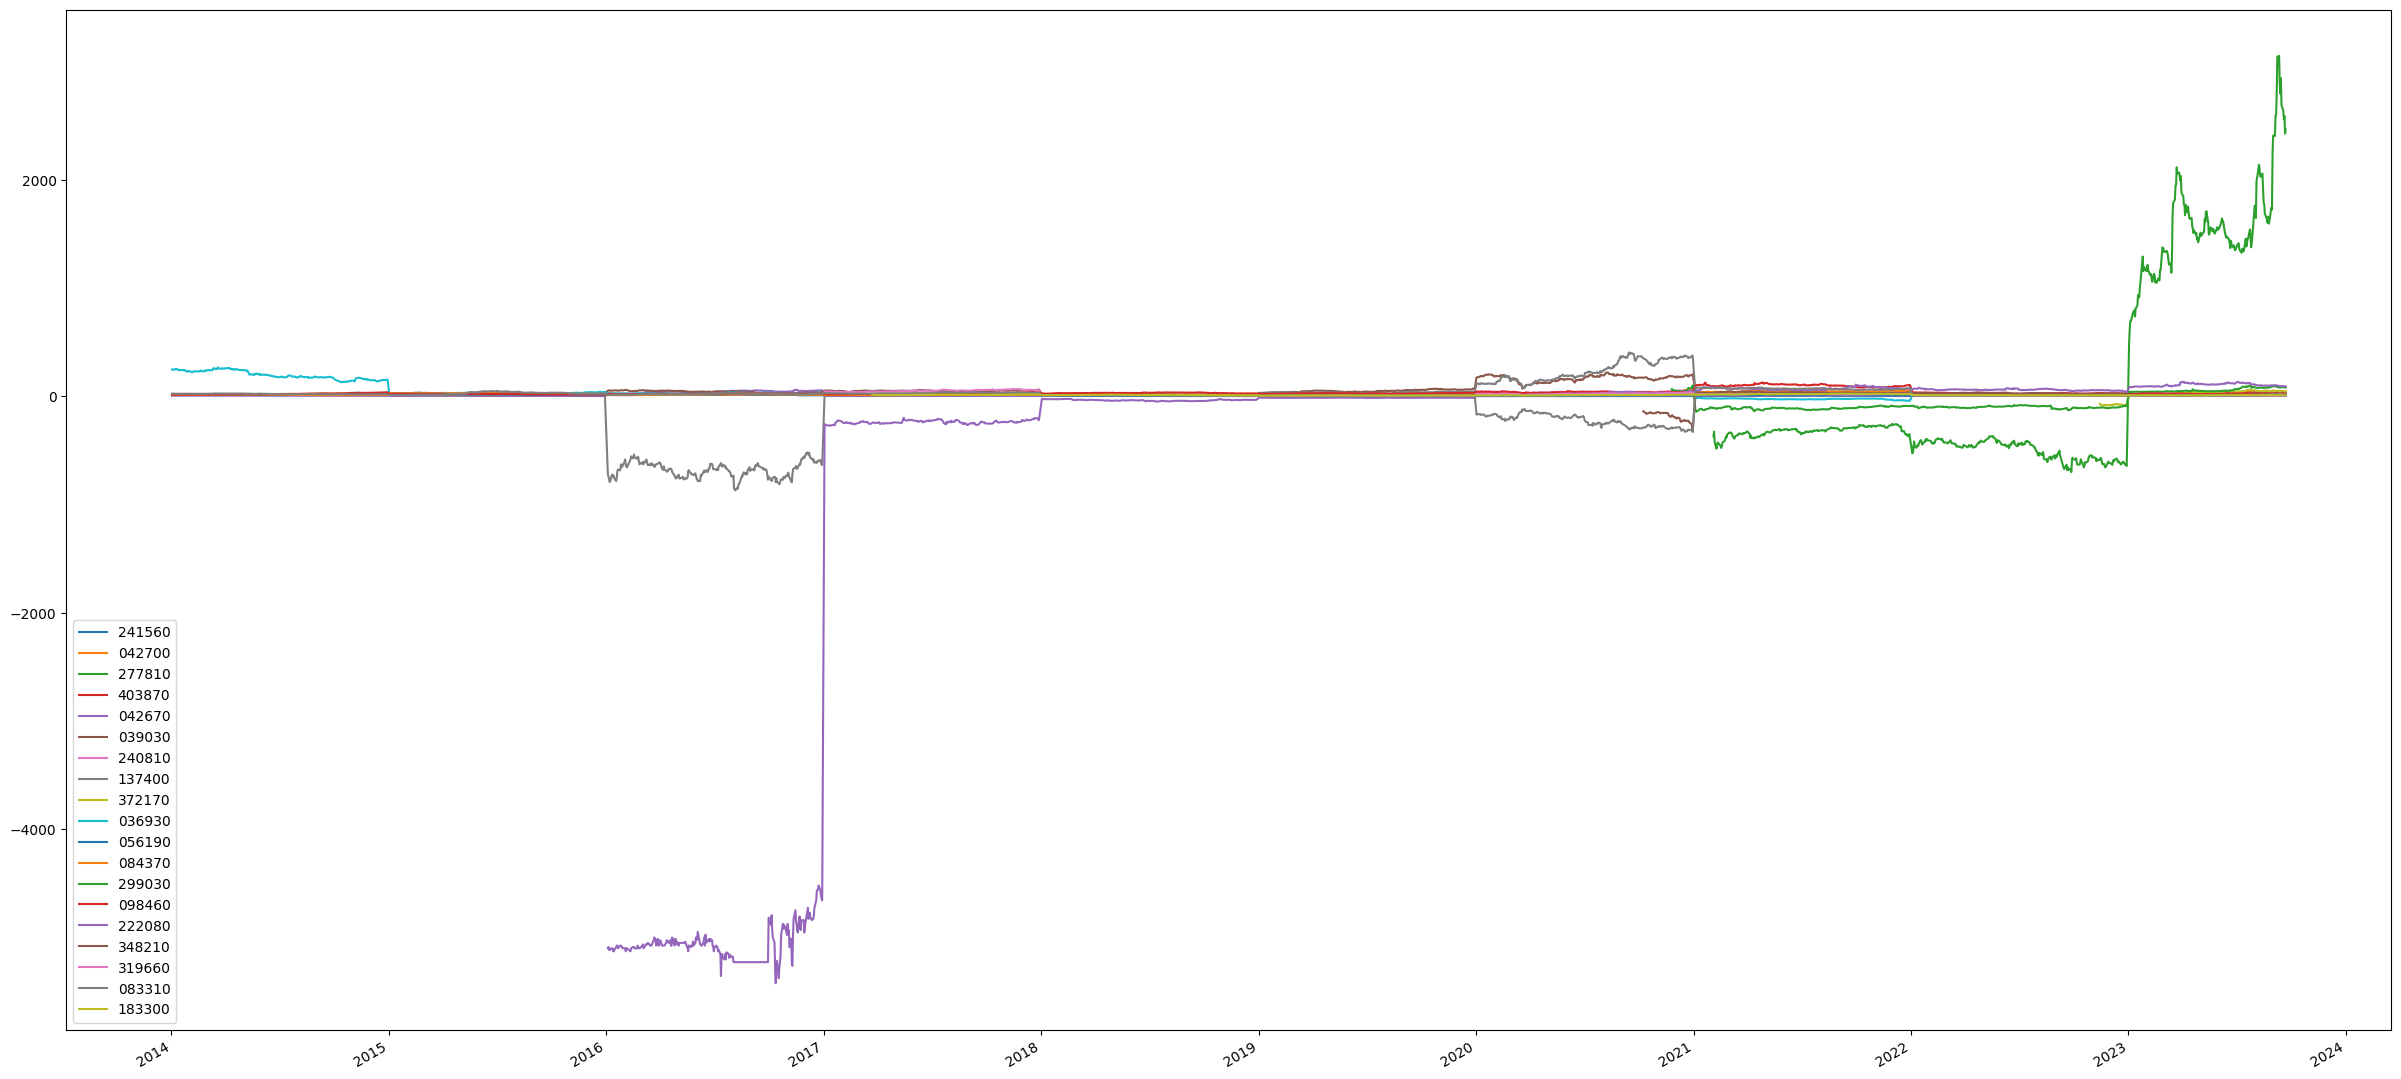

In [51]:
display(price_01)
display(df_EPS_01)
PER_01 = pd.DataFrame()
PER_01.index = price_01.index
for col in price_01.columns:
    if col in divider_01.columns:
        PER_01[col] = (price_01[col].values / divider_01[col].values).round(3)
display(PER_01)
PER_01.plot(figsize=(30,15))

In [ ]:
# To do 
# Quarterly trailing PER ... required last 4 months
# Save data step by step... 
# Use consistent naming across projects... 
# Net Profit PER vs OP Income PER vs EBITDA PER